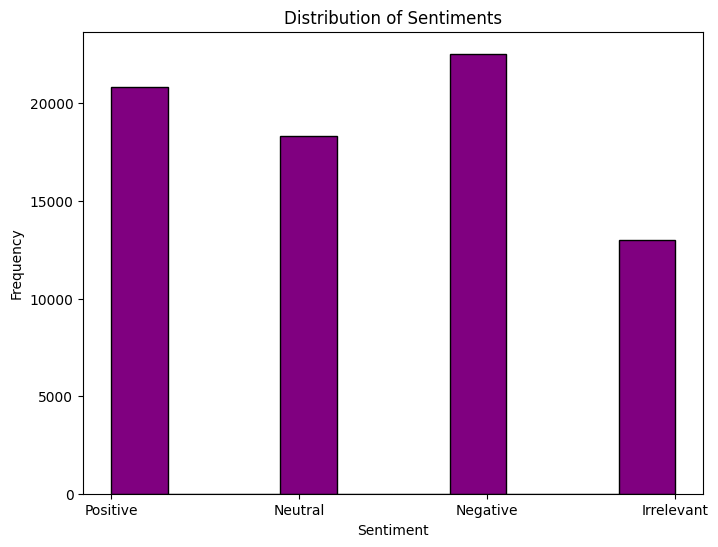

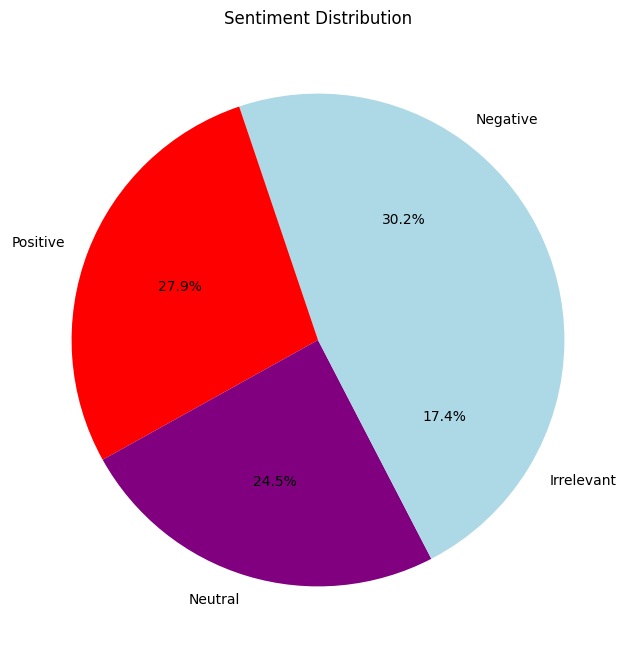

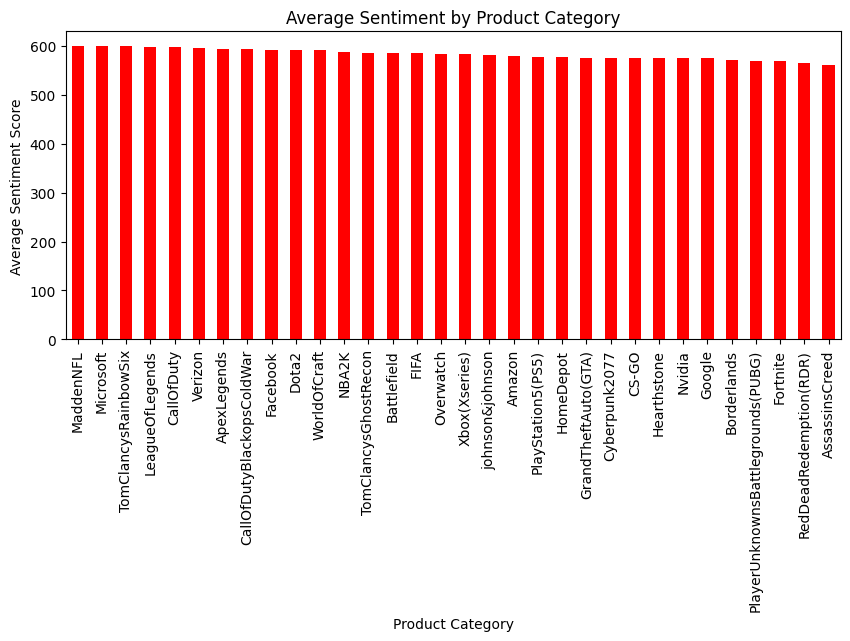

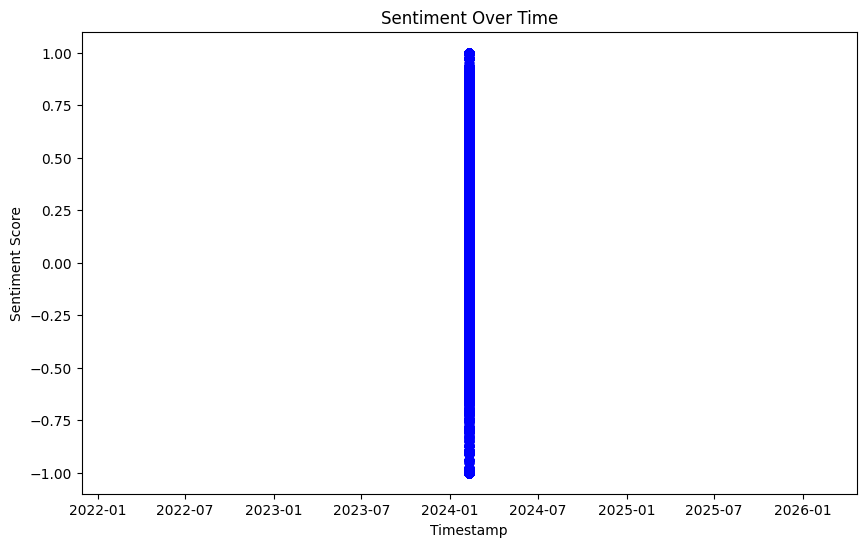

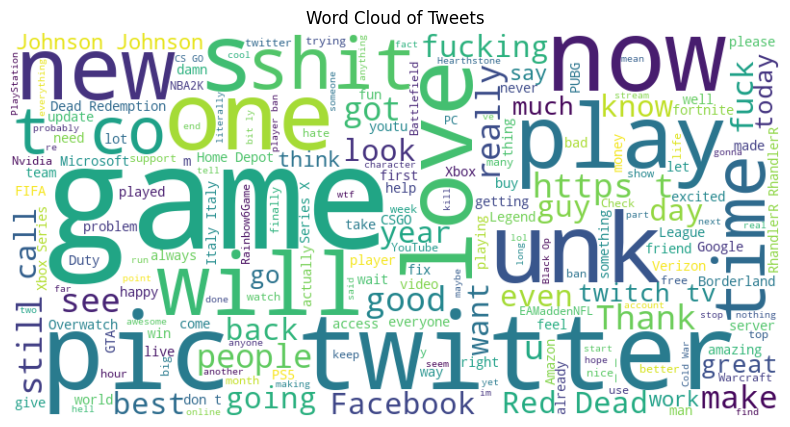

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt


from textblob import TextBlob


column_names = ['id', 'product', 'sentiment', 'text']



tweets=pd.read_csv('./twitter_training.csv', names=column_names)



tweets.head()



tweets.isnull().sum()

#sentiment distribution

plt.figure(figsize=(8, 6))
plt.hist(tweets['sentiment'], color='purple', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.show()


#sentiment piechart
sentiment_counts = tweets['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightblue', 'red', 'purple'])
plt.title('Sentiment Distribution')
plt.show()

#average sentiment over categories

average_sentiment_by_category = tweets.groupby('product')['sentiment'].value_counts().unstack().mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
average_sentiment_by_category.plot(kind='bar', color='red')
plt.xlabel('Product Category')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment by Product Category')
plt.show()

#sentiment overtime

# Assuming you have a 'timestamp' column, if not, you may need to create one
tweets['timestamp'] = pd.to_datetime('now')

# Identify the correct column name for the text data and replace 'text' with the actual column name
tweets['sentiment'] = tweets['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Time series plot
plt.figure(figsize=(10, 6))
plt.plot(tweets['timestamp'], tweets['sentiment'], marker='o', linestyle='-', color='blue')
plt.title('Sentiment Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.show()


#wordcloud
from wordcloud import WordCloud

text_data = ' '.join(tweets['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()